Notebook for Marking Extraction from Panopotes Classification CSV

In [1]:
import pandas as pd
import json

In [2]:
classfile_in = 'ap-aas229-test-classifications.csv'
classifications = pd.read_csv(classfile_in)
len(classifications)

40

In [3]:
classifications

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,23386351,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:22:14 UTC,NaN,NaN,"{""session"":""eb8727582ebc4502bcccd42a749895b17b...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026478"":{""retired"":null,""NX"":""0.5490651"",""N...",5026478
1,23386400,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:24:05 UTC,NaN,NaN,"{""session"":""eb8727582ebc4502bcccd42a749895b17b...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026474"":{""retired"":null,""NX"":""0.60703784"",""...",5026474
2,23386545,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:32:11 UTC,NaN,NaN,"{""session"":""0ab587d4fddac6b1945c84f0c7adc7c9ac...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026484"":{""retired"":null,""NX"":""0.14356157"",""...",5026484
3,23386573,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:33:35 UTC,NaN,NaN,"{""session"":""0ab587d4fddac6b1945c84f0c7adc7c9ac...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026480"":{""retired"":null,""NX"":""0.38636583"",""...",5026480
4,23386766,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:41:49 UTC,NaN,NaN,"{""session"":""0ab587d4fddac6b1945c84f0c7adc7c9ac...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026486"":{""retired"":null,""NX"":""0.2888574"",""N...",5026486
5,23386868,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:46:13 UTC,NaN,NaN,"{""session"":""ed981aba91106cb8b16b8fd53cbb6f0352...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026483"":{""retired"":null,""NX"":""0.44833302"",""...",5026483
6,23386909,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,44.19,2016-12-16 08:48:11 UTC,NaN,NaN,"{""session"":""ed981aba91106cb8b16b8fd53cbb6f0352...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026479"":{""retired"":null,""NX"":""0.5490651"",""N...",5026479
7,23387182,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,49.26,2016-12-16 09:08:49 UTC,NaN,NaN,"{""session"":""74d7958bc1cf7fffec6aa971102032127f...","[{""task"":""T1"",""task_label"":""Anything objects t...","{""5026476"":{""retired"":null,""NX"":""0.59854376"",""...",5026476
8,23387199,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,49.26,2016-12-16 09:10:04 UTC,NaN,NaN,"{""session"":""74d7958bc1cf7fffec6aa971102032127f...","[{""task"":""T1"",""task_label"":""Anything objects t...","{""5026487"":{""retired"":null,""NX"":""0.60703784"",""...",5026487
9,23438985,lcjohnso,63325,2f5b601711b2f96562df,3149,Find Clusters,57.37,2016-12-17 07:33:40 UTC,NaN,NaN,"{""session"":""cf77e97434f420c85b7e01a8055f34ecb3...","[{""task"":""T0"",""task_label"":""Draw circles aroun...","{""5026485"":{""retired"":null,""NX"":""0.35769105"",""...",5026485


In [4]:
classifications['metadata_json'] = [json.loads(q) for q in classifications.metadata]
classifications['annotations_json'] = [json.loads(q) for q in classifications.annotations]
classifications['subject_data_json'] = [json.loads(q) for q in classifications.subject_data]

In [6]:
classifications['n_markings'] = [ len(q[0]['value']) for q in classifications.annotations_json ]

In [7]:
iclass = classifications[classifications.workflow_version == classifications['workflow_version'].max()]
len(iclass)

31

New Output File

In [8]:
# output markings from 31 classifications in iclass to csv
clist=[]
for index, c in iclass.iterrows():
    if c['n_markings'] > 0:
        for q in c.annotations_json[0]['value']:
            clist.append({'classification_id':c.classification_id, 'user_name':c.user_name, 'user_id':c.user_id,
                          'created_at':c.created_at, 'subject_ids':c.subject_ids, 'tool':q['tool'], 
                          'tool_label':q['tool_label'], 'x':q['x'], 'y':q['y'], 'r':q['r'], 'frame':q['frame']})

col_order=['classification_id','user_name','user_id','created_at','subject_ids',
           'tool','tool_label','x','y','r','frame']
out=pd.DataFrame(clist)[col_order]

In [9]:
out

,classification_id,user_name,user_id,created_at,subject_ids,tool,tool_label,x,y,r,frame
0,23438985,lcjohnso,63325,2016-12-17 07:33:40 UTC,5026485,0,Cluster,427.786372,42.646359,28.665652,0
1,23438988,lcjohnso,63325,2016-12-17 07:33:57 UTC,5026475,0,Cluster,189.169840,98.492781,36.285083,0
2,23438990,lcjohnso,63325,2016-12-17 07:34:04 UTC,5026481,0,Cluster,282.585673,242.678090,41.828625,0
3,23439014,lcjohnso,63325,2016-12-17 07:39:51 UTC,5026482,1,Background Galaxy,612.587260,300.555291,202.477933,0
4,23439016,lcjohnso,63325,2016-12-17 07:40:06 UTC,5026477,0,Cluster,137.384975,154.339204,74.815673,1
5,23439020,lcjohnso,63325,2016-12-17 07:40:45 UTC,5026488,0,Cluster,152.615818,182.770109,42.803214,0
6,23439020,lcjohnso,63325,2016-12-17 07:40:45 UTC,5026488,1,Background Galaxy,318.124306,101.538950,20.709963,1
7,23439025,lcjohnso,63325,2016-12-17 07:41:20 UTC,5026473,0,Cluster,376.001507,185.816278,29.568588,0
8,23439025,lcjohnso,63325,2016-12-17 07:41:20 UTC,5026473,1,Background Galaxy,423.724814,169.570046,11.215344,0
9,23439025,lcjohnso,63325,2016-12-17 07:41:20 UTC,5026473,1,Background Galaxy,330.308980,457.940663,14.644156,0


In [10]:
out.to_csv('ap-aas229-test-markings.csv',index_label='mark_id')

Make Overlay Images

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Unique Subjects
usub = classifications.drop_duplicates(subset='subject_ids')
len(usub)

16

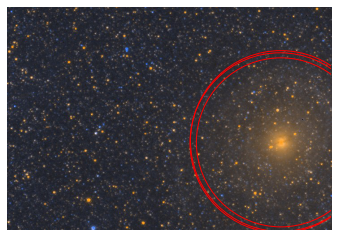

In [13]:
# Make Images

# Select Subject Index Number
subsel=12

marks = out[out.subject_ids == usub.subject_ids[subsel]]
imgnm = list(json.loads(usub.subject_data[subsel]).values())[0]['IMG_COLOR']

imgpath='../ap_sampledata/'
imgfile=imgpath+imgnm

fig, ax = plt.subplots()
im = plt.imread(imgfile)
ax.imshow(im)
for index, m in marks.iterrows():
    if m.tool == 0:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='b', fill=False))
    if m.tool == 1:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='r', fill=False))
    if m.tool > 1:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='g', fill=False))

plt.axis('off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('out_'+imgnm, dpi=120, bbox_inches='tight', pad_inches=0)